## Q1: How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

$$
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1k} \\
a_{21} & a_{22} & \dots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \dots & a_{nk}
\end{bmatrix} 
\begin{bmatrix}
a_{11} & a_{12} & \dots & a_{1m} \\
a_{21} & a_{22} & \dots & a_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
a_{k1} & a_{n2} & \dots & a_{km}
\end{bmatrix}
$$


The answer matrix would have n rows and m coulumns (n,m).An element at the ith row and jth column in the answer matrix is the sumation of the multiplication of respective elements of ith row of the 1st matrix(the (n,k) matrix)  with the respective elements of jth column of the 2nd matrix (the (k,m) matrix). 
$ans_{ij}=(a_{i1}*a_{1j} + a_{i2}*a_{2j} ...... + a_{ik}*a_{kj})$
Therefore, for each element the number of additions required= k-1
and the number of multiplications required= k

Therefore, the total number of __Mulitplications__ required= __nXmXk__


And, the total number of __Additions__ required= __nXmX(k-1)__

## Q2: Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

### Using list of lists

In [4]:
def matrix_mul(A,B):
    ProdMatrix=[]
    n=len(A)
    k=len(B)
    m=len(B[0])
    for i in range(n):
        RowProduct=[]
        for j in range(m):
            ele=0
            for p in range(k):
                ele+=A[i][p]*B[p][j]
            RowProduct.append(ele) 
        ProdMatrix.append(RowProduct)
    return ProdMatrix

### Using Numpy

In [6]:
def Using_Numpy(A,B):
    ProdMatrix=np.dot(A,B)
    return ProdMatrix

### Comparing Time 

In [15]:
import numpy as np
import time
x=np.array([[11,13,15],[2,5,7],[85,100,169],[35,75,1]])
y=np.array([[54,6,76,32,8],[49,21,9,90,56],[5,3,2,6,1]])
t1=time.time()
Result=matrix_mul(x,y)
t2=round((time.time()-t1),6)
print('Result Matrix using lists method: ')
print(Result)
print('Time taken in lists method:',t2)
t3=time.time()
result_np=Using_Numpy(x,y)
t4=round((time.time()-t3),6)

print('Result Matrix using Numpy: ')
print(result_np)
print('Time taken using Numpy:',t4)
print('The difference in time taken:',(t2-t4))

Result Matrix using lists method: 
[[1306, 384, 983, 1612, 831], [388, 138, 211, 556, 303], [10335, 3117, 7698, 12734, 6449], [5570, 1788, 3337, 7876, 4481]]
Time taken in lists method: 0.000153
Result Matrix using Numpy: 
[[ 1306   384   983  1612   831]
 [  388   138   211   556   303]
 [10335  3117  7698 12734  6449]
 [ 5570  1788  3337  7876  4481]]
Time taken using Numpy: 9.4e-05
The difference in time taken: 5.900000000000001e-05


So,as seen above in the code the numpy method is faster compared to using lists. The main reason being is that Numpy functions are written in optimized codes which uses more efficient codes as well as uses vectorization instead of the loops and iterations for every element which reduces time taken significantly.

Thus, using numpy is more efficient.

## Q3:Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Each pass requires a time complexity of O(n).

And to find median it would require n/2 passes.

Thus, Time Complexity of this method would be: __O(n^2/2)__

In [29]:
import time
import numpy as np
test=np.random.rand(10000)

### The Method given in question

In [30]:
def Q_Method(arr):
    copy_arr=arr.copy()
    for i in range(len(arr)//2+1):
        m=copy_arr[0]
        for j in range(len(copy_arr)):
            if m<copy_arr[j]:
                m=copy_arr[j]
        copy_arr=copy_arr[copy_arr!=m]
    return m
                

In [31]:
t1=time.time()
med=Q_Method(test)
t2=round(time.time()-t1,6)
print("Median:",med)
print("Time Taken:",t2)

Median: 0.5023786253451379
Time Taken: 2.412204


### Better Method (Sort Method):

In this method we first sort the array and then the middle element would be the median:

In [32]:
def Better_M(arr):
    copy_arr=arr.copy()
    copy_arr.sort()
    if len(copy_arr)%2==0:
        med=(copy_arr[len(copy_arr)//2]+copy_arr[(len(copy_arr)//2)-1])/2
        return med
    else:
        med=copy_arr[len(copy_arr)//2]
        return med

In [33]:
t1=time.time()
med=Better_M(test)
t2=round(time.time()-t1,6)
print("Median:",med)
print("Time Taken:",t2)

Median: 0.502414975220776
Time Taken: 0.007813


### Using Numpy

In [36]:
def using_np(arr):
    med= np.median(arr)
    return med

In [41]:
t1=time.time()
med=using_np(test)
t2=round(time.time()-t1,6)
print("Median:",med)
print("Time Taken:",t2)

Median: 0.502414975220776
Time Taken: 0.000869


#### Thus, the numpy method is the fastest compared to the other 2 methods and the method mentioned in the question takes too much time compared to the other 2 methods.

## Q4:What is the gradient of the following function with respect to x and y?

$$ x^2y+y^3sin(x)$$

The gradient of the function:$x^2y+y^3sin(x)$ with respect to x and y means the partial deerivative with respect to x and y respectively.

Gradient with respect to x: $$ 2xy+y^3cos(x)$$

Gradient with respect to y: $$ x^2+3y^2sin(x)$$

## Q5:Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [123]:
import jax
import jax.numpy as jnp
def f(x,y):
    return (x**2)*y+y**3*(jnp.sin(x))
def fPrime_x(x,y):
    return 2*x*y+(y**3)*(jnp.cos(x))
def fPrime_y(x,y):
    return x**2+3*(y**2)*(jnp.sin(x))

x=7.0
y=5.0
defr=jax.grad(f,argnums=(0,1))
gradient=defr(x,y)
print("Gradient calculated in last question w.r.t x:",fPrime_x(x,y))
print("Gradient calculated using JAX w.r.t x:",gradient[0])
print("Gradient calculated in last question w.r.t y:",fPrime_y(x,y))
print("Gradient calculated using JAX w.r.t x:",gradient[1])

Gradient calculated in last question w.r.t x: 164.2378
Gradient calculated using JAX w.r.t x: 164.2378
Gradient calculated in last question w.r.t y: 98.273994
Gradient calculated using JAX w.r.t x: 98.273994


Hence, the gradient calculated in the last question was correct

## Q6:Use sympy to confirm that you obtain the same gradient analytically.

In [20]:
import sympy
def f(x,y):
    return (x**2)*y+y**3*(sympy.sin(x))
x=sympy.Symbol('x')
y=sympy.Symbol('y')
z=f(x,y)
df_dx=sympy.diff(z,x)
print("Gradient w.r.t. x:",str(df_dx))
df_dy=sympy.diff(z,y)
print("Gradient w.r.t. y:",str(df_dy))

Gradient w.r.t. x: 2*x*y + y**3*cos(x)
Gradient w.r.t. y: x**2 + 3*y**2*sin(x)


## Q7: Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. 

In [100]:
Student_info={
    2022:{
        "Branch 1":{
            "Roll Number": 1,
            "Name": "N",
            "Marks":{
                "Maths":100,
                "English":70
            }
        },
        "Branch 2":{
            
        }
    
    },
    2023:{
        "Branch 1":{
            
        },
        "Branch 2":{
            
        }
    },
    2024:{
        "Branch 1":{
            
        },
        "Branch 2":{
            
        }
    },
    2025:{
        "Branch 1":{
            
        },
        "Branch 2":{
            
        }
    },
}
print(Student_info)

{2022: {'Branch 1': {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


## Q8:Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [114]:
class Mark:
    def __init__(self,subject,marks):
        self.Subject=subject
        self.Marks=marks
    def __str__(self):
        return f"{self.Subject}:{self.Marks}"
class Students:
    def __init__(self,Roll_number,Name):
        self.Name=Name
        self.RollNumber=Roll_number
        self.marks=[]
    def add_marks(self,subject,markss):
        marks=Mark(subject,markss)
        self.marks.append(marks)
    def __str__(self):
        Mark_str=', '.join(str(m)for m in self.marks)
        return f"Roll Number: {self.RollNumber}, Name: {self.Name}, Marks: \n{Mark_str}"
class Branch:
    def __init__(self,branch_name):
        self.branch=branch_name
        self.students=[]
    def add_students(self,student):
        self.students.append(student)
    def __str__(self):
        student_str=', '.join(str(s)for s in self.students)
        return f"{self.branch}\n{student_str}"
class Year:
    def __init__(self,Year_name):
        self.Year=Year_name
        self.branches=[]
    def add_branch(self,branch):
        self.branches.append(branch)
    def __str__(self):
        branch_str=''.join(str(b)for b in self.branches)
        return f"{self.Year}\n{branch_str}"
class Student_info:
    def __init__(self):
        self.yrs=[]
    def add_year(self,year):
        self.yrs.append(year)
    def __str__(self):
        year_str=''.join(str(y)for y in self.yrs)
        return f"Student Info\n{year_str}"

s1=Students(1,"N")
s1.add_marks("Maths",100)
s1.add_marks("English",70)

b1_2022=Branch("Branch 1")
b1_2022.add_students(s1)

b2_2022=Branch("Branch 2")

Year_22=Year("2022")
Year_22.add_branch(b1_2022)
Year_22.add_branch(b2_2022)

b1_23=Branch("Branch 1")
b2_23=Branch("Branch 2")

Year_23=Year("2023")
Year_23.add_branch(b1_23)
Year_23.add_branch(b2_23)

b1_24=Branch("Branch 1")
b2_24=Branch("Branch 2")

Year_24=Year("2024")
Year_24.add_branch(b1_24)
Year_24.add_branch(b2_24)

b1_25=Branch("Branch 1")
b2_25=Branch("Branch 2")

Year_25=Year("2025")
Year_25.add_branch(b1_25)
Year_25.add_branch(b2_25)

Student_info=Student_info()
Student_info.add_year(Year_22)
Student_info.add_year(Year_23)
Student_info.add_year(Year_24)
Student_info.add_year(Year_25)
print(Student_info)

Student Info
2022
Branch 1
Roll Number: 1, Name: N, Marks: 
Maths:100, English:70Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2



## Q9: Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0.5,100.0,0.5)

### 1. $y=x$

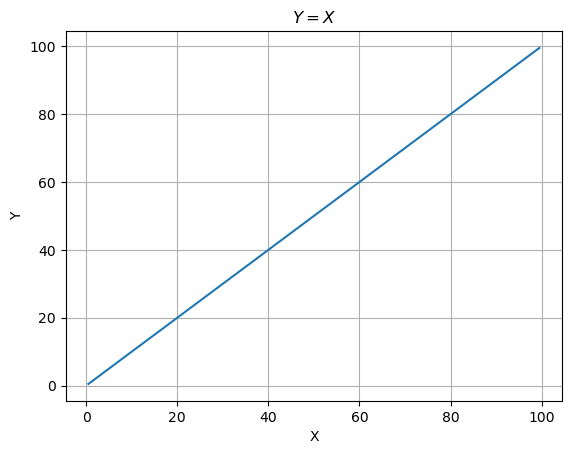

In [29]:
y=x
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("$Y=X$")
plt.grid()
plt.show()

### 2. $y=x^2$

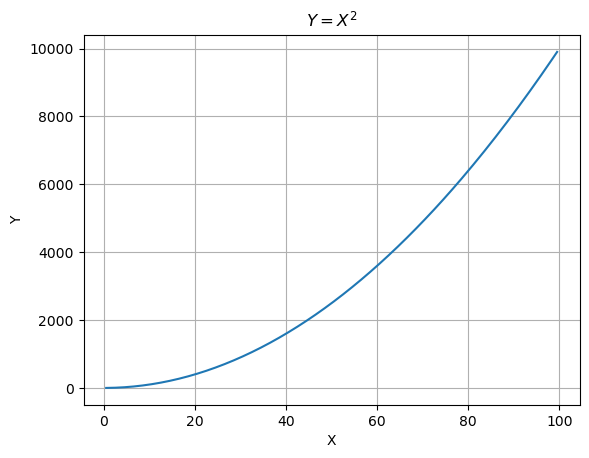

In [26]:
y=x**2
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("$Y=X^2$")
plt.grid()
plt.show()

### 3. $y=x^3/100$

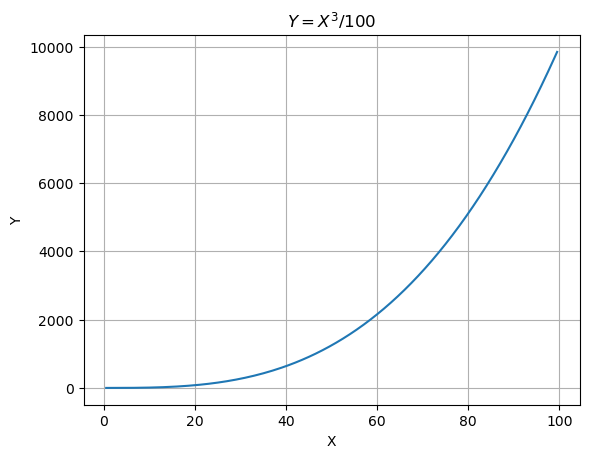

In [28]:
y=(x**3)/100
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("$Y=X^3/100$")
plt.grid()
plt.show()

### 4. $y=Sin(x)$ 

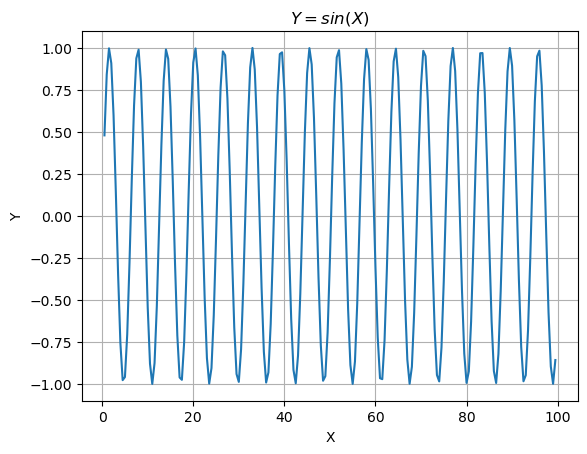

In [31]:
y=np.sin(x)
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("$Y=sin(X)$")
plt.grid()
plt.show()

### 5. $y=Sin(x)/x$ 

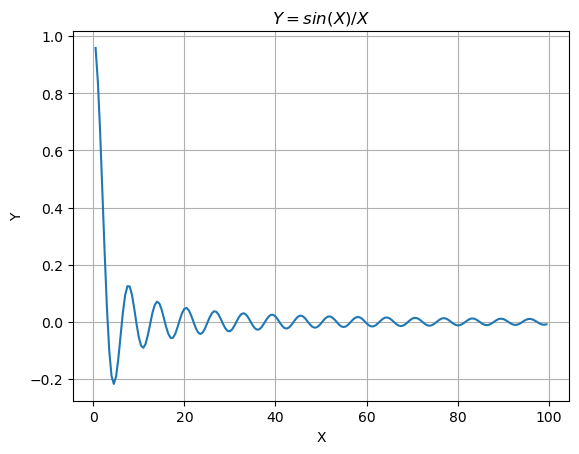

In [32]:
y=np.sin(x)/x
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("$Y=sin(X)/X$")
plt.grid()
plt.show()

### 6. $y=log(x)$ 

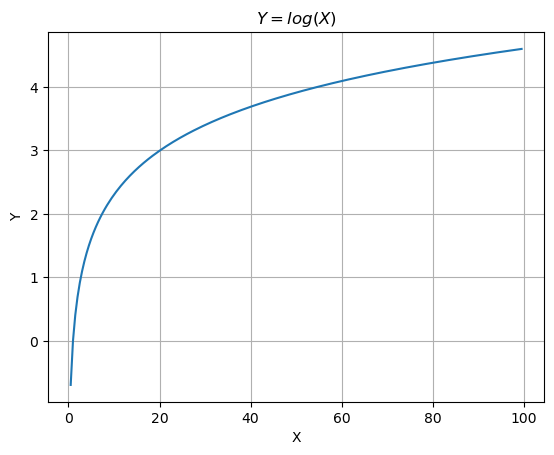

In [33]:
y=np.log(x)
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("$Y=log(X)$")
plt.grid()
plt.show()

### 7. $y=e^x$ 

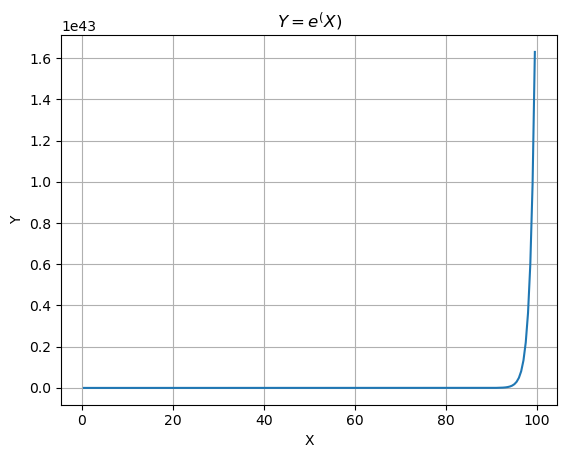

In [35]:
y=np.exp(x)
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("$Y=e^(X)$")
plt.grid()
plt.show()

## Q10: Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [63]:
import numpy as np
import pandas as pd
matrix=np.random.uniform( low=1,high=2, size=(20,5))
df=pd.DataFrame(matrix)
df.columns=['a', 'b', 'c', 'd', 'e']
standard_dev=df.std()
max_std=max(standard_dev)
max_column=df.std().idxmax()
print("The column with highest Standard Deviation:",max_column,",And its Standard Deviation:",max_std)
meany=df.mean(axis=1)
min_mean=min(meany)
min_row=df.mean(axis=1).idxmin()
print("The row with smallest Mean:",min_row,",And its Mean:",min_mean)

The column with highest Standard Deviation: a ,And its Standard Deviation: 0.30926816520945655
The row with smallest Mean: 15 ,And its Mean: 1.3054897270061634


## Q11: Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [81]:
df['f']=df['a']+df['b']+df['c']+df['d']+df['e']
df['g']=np.where(df['f']>8,'GT8','LT8')
print(df)
lt8=(df['g']=="LT8")
print("Number of rows with g column having value 'LT8':",lt8.sum())

lt8_std=df[lt8]['f'].std()
print("The standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8':",lt8_std)

gt8=(df['g']=="GT8")
gt8_std=df[gt8]['f'].std()
print("The standard deviation of the column 'f' for the rows where the value in the column 'g' is 'GT8':",gt8_std)


           a         b         c         d         e         f    g
0   1.068840  1.131083  1.574727  1.818036  1.677510  7.270197  LT8
1   1.024554  1.677341  1.207606  1.552582  1.627325  7.089407  LT8
2   1.785996  1.614853  1.184374  1.389353  1.396037  7.370612  LT8
3   1.435502  1.513380  1.602216  1.602691  1.467411  7.621200  LT8
4   1.297986  1.139706  1.885001  1.710345  1.290104  7.323141  LT8
5   1.509901  1.173598  1.558266  1.902524  1.819247  7.963535  LT8
6   1.050223  1.764304  1.428822  1.928229  1.740323  7.911900  LT8
7   1.292468  1.351376  1.320621  1.146015  1.504213  6.614693  LT8
8   1.028188  1.015935  1.958024  1.944049  1.101489  7.047686  LT8
9   1.933412  1.473659  1.444261  1.717791  1.509960  8.079082  GT8
10  1.289541  1.216673  1.431939  1.509953  1.739754  7.187860  LT8
11  1.413344  1.239437  1.939487  1.352859  1.125065  7.070192  LT8
12  1.374374  1.045350  1.259863  1.987773  1.090692  6.758053  LT8
13  1.515612  1.051227  1.158653  1.895041  1.27

## Q12: Write a small piece of code to explain broadcasting in numpy.

Broadcasting in numpy is the feature which is very useful when there is arthematic operations of matrices of different shapes.
It changes the shape of the matrices such that they are of same shape and compatible for the desired arthematic operation.

In [98]:
a=np.array([[1,2,4,5],[3,5,8,3],[96,68,4,21]])
b=np.array([[1,34],[2,54],[3,21],[4,56]])
x=a+5
y=b*5
print("orginal matrix a:",a)
print("on adding 5:",x)
print("orginal matrix b:",b)
print("on multiplying 5:",y)

z=np.dot(a,b)
print(" on multiplying the matrices:",z)

orginal matrix a: [[ 1  2  4  5]
 [ 3  5  8  3]
 [96 68  4 21]]
on adding 5: [[  6   7   9  10]
 [  8  10  13   8]
 [101  73   9  26]]
orginal matrix b: [[ 1 34]
 [ 2 54]
 [ 3 21]
 [ 4 56]]
on multiplying 5: [[  5 170]
 [ 10 270]
 [ 15 105]
 [ 20 280]]
 on multiplying the matrices: [[  37  506]
 [  49  708]
 [ 328 8196]]


## Q13:Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [95]:
def my_argmin(arr):
    m,n=arr.shape
    ind=[0,0]
    mini=arr[0][0]
    for i in range(m):
        for j in range(n):
            if arr[i][j]<mini:
                mini=arr[i][j]
                ind[0]=i
                ind[1]=j
    return ind
arr=np.array([[2,4,12,3],[5,7,2,1],[1,45,0,7]])
min_index=my_argmin(arr)
print("Index of min element without using np.argmin:",min_index)
min_index_argmin_1d=np.argmin(arr)
min_index_2d=np.unravel_index(min_index_argmin_1d,arr.shape)
print("Index of min element using np.argmin:",min_index_2d)

Index of min element without using np.argmin: [2, 2]
Index of min element using np.argmin: (2, 2)
